In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-newton-usage)

```{index} ! Julia; enumerate
```

Suppose we want to evaluate the inverse of the function $h(x)=e^x-x$. This means solving $y=e^x-x$ for $x$ when $y$ is given, which has no elementary form. If a value of $y$ is given numerically, though, we simply have a rootfinding problem for $f(x)=e^x-x-y$.
```{tip}
:class: dropdown
When a function is created, it can refer to any variables in scope at that moment. Those values are locked in to the definition, which is called a _closure_. If the enclosed variables change values later, the function still uses the values it was created with.
```

In [2]:
h = @(x) exp(x) - x;
dh_dx = @(x) exp(x) - 1;
y_ = linspace(h(0), h(2), 200);
x_ = zeros(size(y_));
for i = 1:length(y_)
    f = @(x) h(x) - y_(i);
    df_dx = @(x) dh_dx(x);
    x = newton(f, df_dx, 1);  x_(i) = x(end);
end

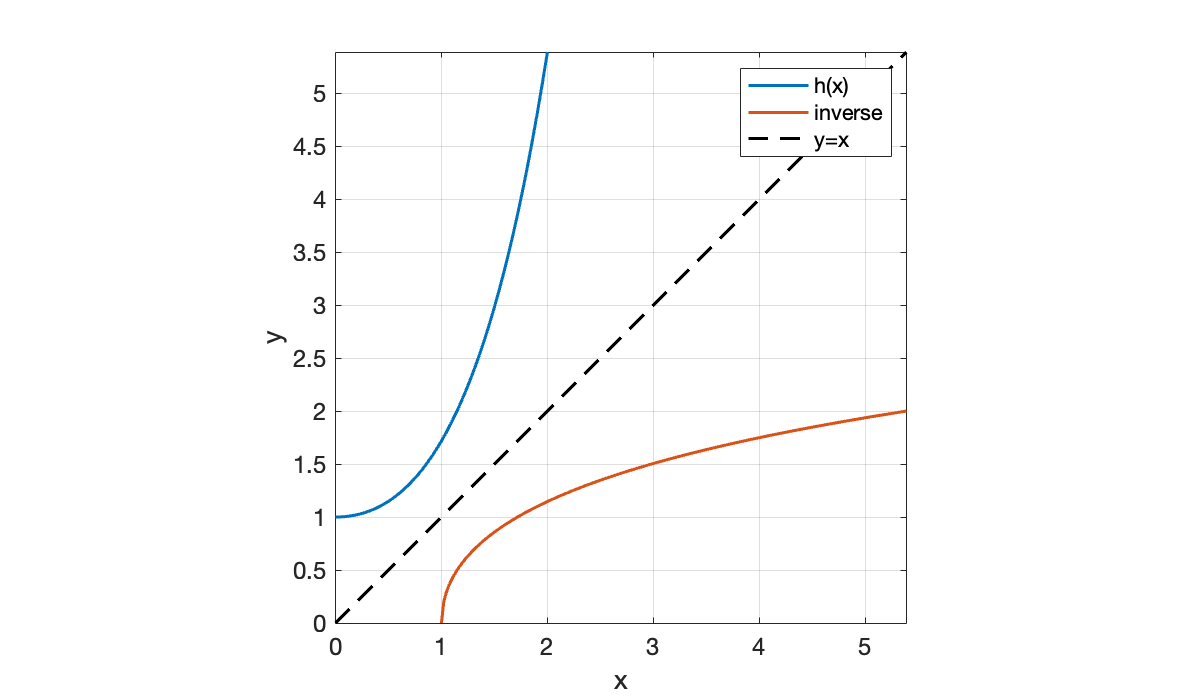

In [4]:
clf, fplot(h, [0, 2])
hold on, axis equal
plot(y_, x_)
plot([0, max(y_)], [0, max(y_)], 'k--')
xlabel('x'), ylabel('y')
grid on
legend('h(x)', 'inverse', 'y=x');